# Credit Card Fraud Detection 
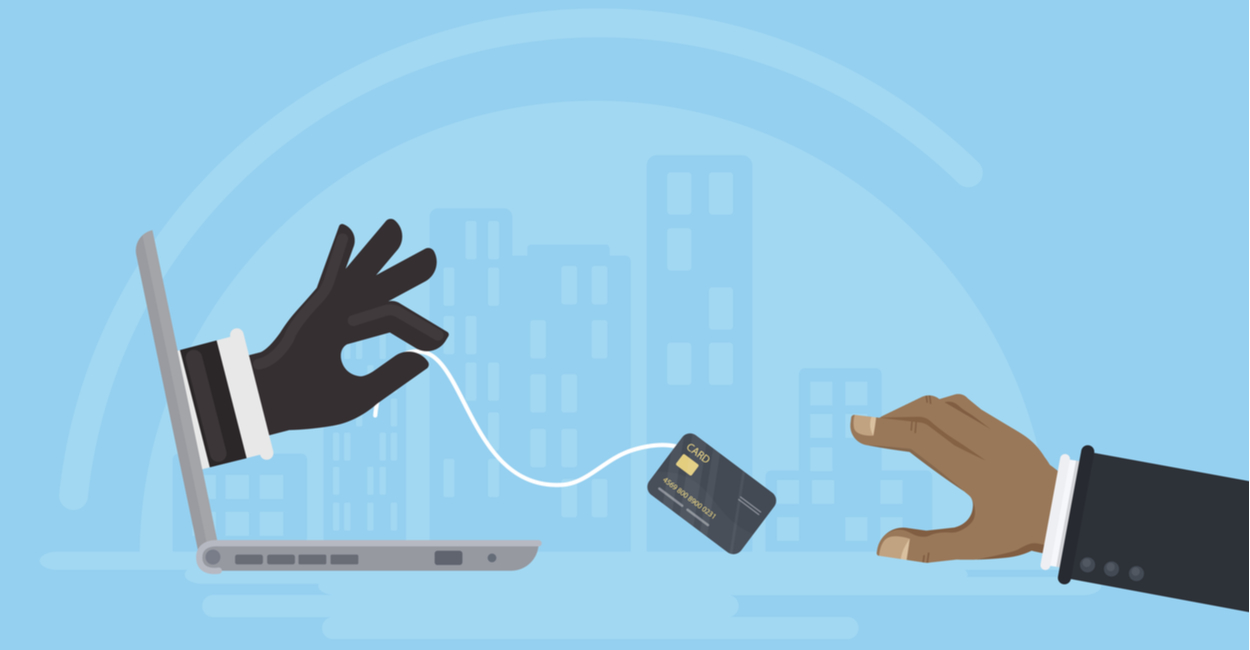


Fraud detection is a set of processes and analyses that allow businesses to identify and prevent unauthorized financial activity. This can include fraudulent credit card transactions, identify theft, cyber hacking, insurance scams, and more.

# Introduction

Our goal is to identify fraudulent transaction and it is basically a anomaly detection problem. Anomaly detection is a technique used to identify unusual patterns that do not conform to expected behavior, called outliers. It has many applications in business, from intrusion detection (identifying strange patterns in network traffic that could signal a hack) to system health monitoring (spotting a malignant tumor in an MRI scan), and from fraud detection in credit card transactions to fault detection in operating environments. This dataset is suffered from the problem of imbalanced dataset as number of fraudulent transactions are very few in comparison of non fraudulent transactions this is the reason that most of the machine learning and deep learning models will not provide satisfactory results and/or unable to identify fraudulent transasctions.



# Dataset 



> We have pulled the credit card fraud detection dataset on Kaggle. 
https://www.kaggle.com/mlg-ulb/creditcardfraud



> Observation from the dataset:


1.   The dataset consists of numerical values from the 28 ‘Principal Component Analysis (PCA)’ transformed features, namely V1 to V28. Furthermore, there is no metadata about the original features provided, so pre-analysis or feature study could not be done.

2.   The ‘Time’ and ‘Amount’ features are not transformed data. 
3.There is no missing value in the dataset.

The workflow for this problem is detailed below:

1. EDA

2. Finding correlation of attributes with target variable
3. Preprocessing the data
4. Apply Deep Neural Network
5. Apply Machine Learning Classifiers (Random forest, Decision Tree Classifier)
6. Apply Undersampling
7. Apply Deep Neural network to check the accuracy and false negatives.
8. Apply SMOTE - Oversampling
9. Apply Deep Neural network to check the accuracy and false negatives.
10. Final remarks














# Initialization
Essential libraries are imported primarily.

In [1]:
import pandas as pd
import numpy as np
import keras
np.random.seed(2)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Dataset Loading

In [2]:
data = pd.read_csv("creditcard.csv")

# Exploratory Data Analysis (EDA)



> Checking the actual data how it looks like by looking at top 5 rows of the dataset.



In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0




> Checking the last 5 entries to get the idea of data distribution from top to end.



In [4]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0




> Checking the count of fraudulent and normal transactions



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


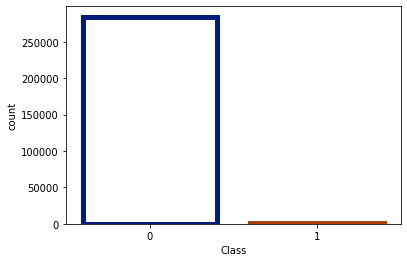

In [5]:
sns.countplot(data['Class'],facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3), label = "Count")

**It seems that there are very few Fraudulent Transactions in comparison to Normal Transactions.**

In [6]:
fraud_indices=np.array(data[data.Class==1].index)
no_records_fraud=len(fraud_indices)
normal_indices=np.array(data[data.Class==0].index)
no_records_normal=len(normal_indices)

print("No. of Fraudulent Transaction is {} and No. of Normal Transaction is {}".format(no_records_fraud, no_records_normal))

No. of Fraudulent Transaction is 492 and No. of Normal Transaction is 284315


**Checking the actual distribution of Amount** 


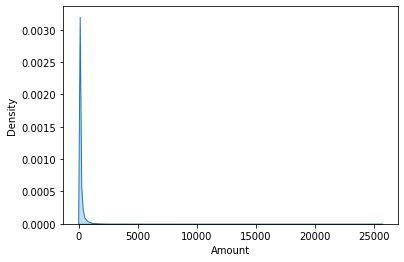

In [7]:
sns.kdeplot(data['Amount'],shade=True)

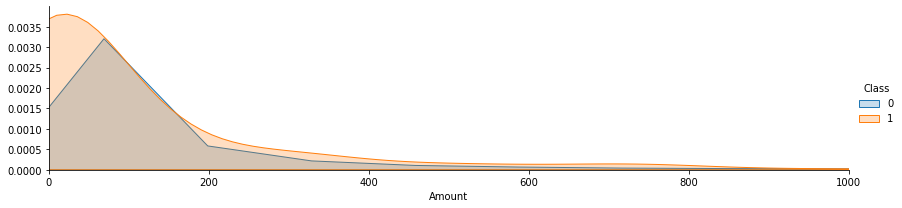

In [8]:
fig=sns.FacetGrid(data,hue='Class',aspect=4)
fig.map(sns.kdeplot,'Amount',shade=True)
oldest=data['Amount'].max()
fig.set(xlim=(0,1000))
fig.add_legend()

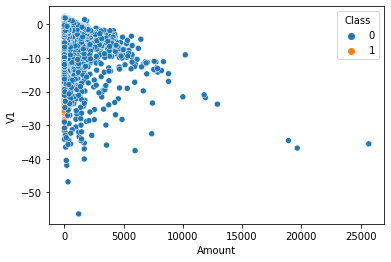

In [9]:
sns.scatterplot(x = 'Amount', y = 'V1',hue='Class',  data = data)

As the number of fraudulent transactions are very less in comparison to normal transactions we are not able to see fraudulent transactions.

# Features correlation with the target variable

In [10]:
dataset2 = data.drop(columns = ['Class'])

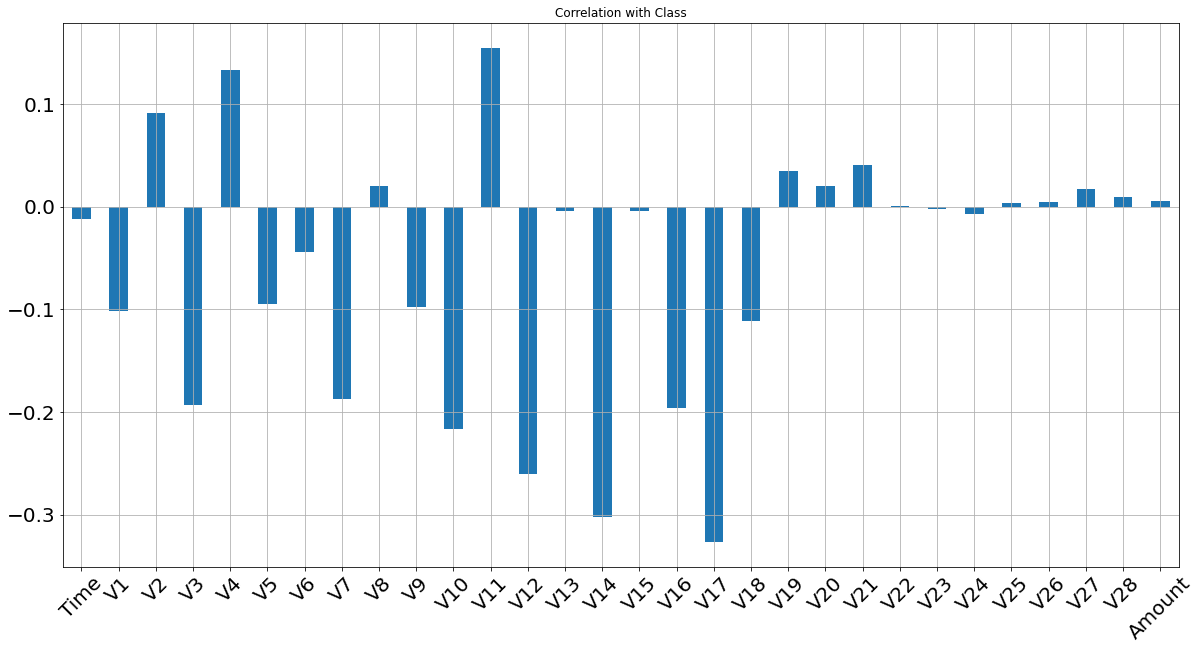

In [11]:
dataset2.corrwith(data.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class", fontsize = 20,
        rot = 45, grid = True)

# Data Preprocessing

As all the features from V1 to V28 are already normalized, so we just have to normalize the Amount.

In [12]:
data['normalized_amount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data=data.drop(['Amount'],axis=1)

**Checking the dataset for changed column**

In [13]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


Temporal effects are considered to be negligible in this study. Therefore, the 'Time' column is dropped from the dataset.

In [14]:
data=data.drop(['Time'],axis=1)

In [15]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


**Assigning features and the target variable**

In [16]:
X=data.iloc[:,data.columns!='Class']
y=data.iloc[:,data.columns=='Class']

In [17]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalized_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [18]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


# Splitting the data into Train and Test set

The data is splitted into 70% training set and 30% test set.



In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [20]:
X_train.shape 

(199364, 29)

In [21]:
X_test.shape 

(85443, 29)

Deep learning models support numpy arrays as input. Therefore, we have to convert the X test,X_Train,ytest,y_train into numpy arrays.

In [22]:
X_train = np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

# Deep Neural Network

**Model Definition**

I used the Keras Sequential API, where you have just to add one layer at a time, starting from the input. 

The first is the sequential layer. It takes 16 units (Positive Integer), it specifies dimensionality of the output space and the activation function used in this layer is relu.

**relu** is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network. 

**sigmoid**: The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.

In second layer I have used 24 units and used activation function **relu**.

**Dropout** is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting. As the dataset is large I have opted for 0.5 dropout.

In third layer I have used 20 units and used activation function **relu**.

In fourth layer I have used 24 units and used activation function **relu**.

In the last layer, the output should be a single node so 1 has been used and the activation function is **sigmoid**.











In [23]:
model = Sequential([
     #First Layer
     Dense(units=16, input_dim=29, activation='relu'),
     #Second Layer
     Dense(units=24,activation='relu'),
     Dropout(0.5),
     #Third Layer
     Dense(20,activation='relu'),
     #Fourth Layer
     Dense(24,activation='relu'),
     #Fifth Layer
     Dense(1,activation='sigmoid')      
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

# Setting Optimizer and Loss Function

Once our layers are added to the model, we need to set up the **metrics**, a **loss function** and an **optimization algorithm**.

We define the loss function to measure how poorly our model performs on instances with known labels. It is the error rate between the observed labels and the predicted ones. We use a specific form for categorical classifications (=2 classes) called the **binary_crossentropy**.

The most important function is the optimizer. This function will iteratively improve parameters (filters weights and bias of neurons, etc.) in order to minimize the loss.

I choosed the **Adam** optimizer because it combines the advantages of two other extensions of stochastic gradient descent. Specifically:

**1) Adaptive Gradient Algorithm (AdaGrad)** that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).

**2) Root Mean Square Propagation (RMSProp)** that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).

Adam realizes the benefits of both **AdaGrad** and **RMSProp**.

Adam is a popular algorithm in the field of deep learning because it achieves good results fast.

The metric function "accuracy" is used is to evaluate the performance our model. This metric function is similar to the loss function, except that the results from the metric evaluation are not used when training the model (only for evaluation).

I have used 5 epochs and batch size of 15.











In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=15, epochs=5)

Epoch 1/5
13291/13291 [==============================] - 35s 2ms/step - loss: 0.0257 - accuracy: 0.9944
Epoch 2/5
13291/13291 [==============================] - 20s 1ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 3/5
13291/13291 [==============================] - 20s 1ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 4/5
13291/13291 [==============================] - 20s 1ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 20s 1ms/step - loss: 0.0027 - accuracy: 0.9995


In [25]:
score=model.evaluate(X_test,y_test)
print(score)

2671/2671 [==============================] - 3s 968us/step - loss: 0.0042 - accuracy: 0.9994
[0.004232405219227076, 0.9994148015975952]


In [26]:
y_pred_train=model.predict(X_train)
y_train=pd.DataFrame(y_train)
y_pred_test=model.predict(X_test)
y_test=pd.DataFrame(y_test)

In [27]:
y_pred=model.predict(X_test)
y_test=pd.DataFrame(y_test)

In [28]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [29]:
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

# Confusion Matrix


In [30]:
# Function to plot Confusion Matrix (to be used later).
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plotting Confusion matrix for the Test Set

Confusion matrix, without normalization
[[85277    19]
 [   31   116]]


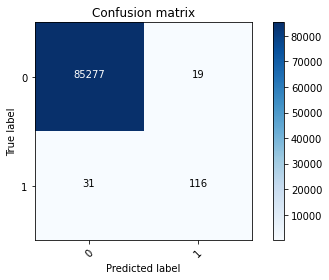

In [31]:
cnf_matrix=confusion_matrix(y_test,y_pred_test.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [32]:
Precision = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[0][1])
Recall = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[1][0])
F1 = 2*(Precision*Recall)/(Precision+Recall)
print("Precision:",Precision)
print("Recall:",Recall)
print("F1:",F1)

Precision: 0.8592592592592593
Recall: 0.7891156462585034
F1: 0.822695035460993


# Plotting Confusion matrix for the Train Set

Confusion matrix, without normalization
[[198975     44]
 [    60    285]]


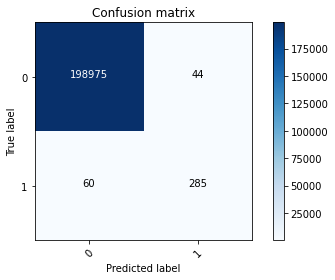

In [33]:
cnf_matrix=confusion_matrix(y_train,y_pred_train.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [34]:
Precision = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[0][1])
Recall = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[1][0])
F1 = 2*(Precision*Recall)/(Precision+Recall)
print("Precision:",Precision)
print("Recall:",Recall)
print("F1:",F1)

Precision: 0.8662613981762918
Recall: 0.8260869565217391
F1: 0.8456973293768546


# Plotting Confusion matrix for the entire dataset

Confusion matrix, without normalization
[[284252     63]
 [    91    401]]


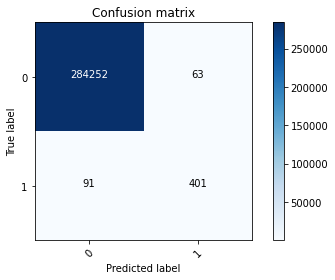

In [35]:
y_pred=model.predict(X)
y_test=pd.DataFrame(y)
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [36]:
Precision = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[0][1])
Recall = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[1][0])
F1 = 2*(Precision*Recall)/(Precision+Recall)
print("Precision:",Precision)
print("Recall:",Recall)
print("F1:",F1)

Precision: 0.8642241379310345
Recall: 0.8150406504065041
F1: 0.8389121338912133


**Our model not able to identify all the fraudulent transactions for entire dataset also as number of false negative is 112.**



# Applying Decision Tree Classifier

In [37]:
X=data.iloc[:,data.columns!='Class']
y=data.iloc[:,data.columns=='Class']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [39]:
from sklearn.tree import DecisionTreeClassifier
decc=DecisionTreeClassifier()
decc.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Plotting Confusion matrix for the Test Set

In [40]:
y_pred=decc.predict(X_test)

Confusion matrix, without normalization
[[85273    23]
 [   37   110]]


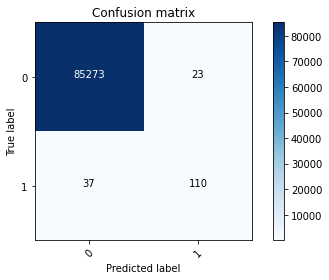

In [41]:
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [42]:
Precision = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[0][1])
Recall = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[1][0])
F1 = 2*(Precision*Recall)/(Precision+Recall)
print("Precision:",Precision)
print("Recall:",Recall)
print("F1:",F1)

Precision: 0.8270676691729323
Recall: 0.7482993197278912
F1: 0.7857142857142857


# Plotting Confusion matrix for the Train Set

In [43]:
y_pred_train=decc.predict(X_train)

Confusion matrix, without normalization
[[199019      0]
 [     0    345]]


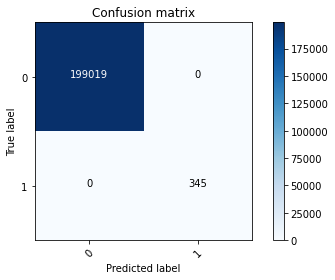

In [44]:
cnf_matrix=confusion_matrix(y_train,y_pred_train.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [45]:
Precision = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[0][1])
Recall = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[1][0])
F1 = 2*(Precision*Recall)/(Precision+Recall)
print("Precision:",Precision)
print("Recall:",Recall)
print("F1:",F1)

Precision: 1.0
Recall: 1.0
F1: 1.0


# Plotting Confusion matrix for the entire dataset

Confusion matrix, without normalization
[[284292     23]
 [    37    455]]


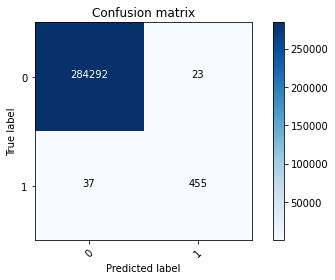

In [46]:
y_pred=decc.predict(X)
cnf_matrix=confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [47]:
Precision = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[0][1])
Recall = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[1][0])
F1 = 2*(Precision*Recall)/(Precision+Recall)
print("Precision:",Precision)
print("Recall:",Recall)
print("F1:",F1)

Precision: 0.9518828451882845
Recall: 0.9247967479674797
F1: 0.9381443298969072


Still there is a significantly more number of false negatives so we have to apply undersampling and oversampling techniques to see that the performance of the model will improve or not.



# Imbalanced Dataset Problem


It is the problem in machine learning where the total number of a class of data (positive) is far less than the total number of another class of data (negative). This problem is extremely common in practice and can be observed in various disciplines including fraud detection, anomaly detection, medical diagnosis, oil spillage detection, facial recognition, etc.

Most machine learning algorithms and works best when the number of instances of each classes are roughly equal. When the number of instances of one class far exceeds the other, problems arise. 

Given a dataset of transaction data, The e-commerce company would like to find out which are fraudulent and which are genuine ones. Now, it is costly to the company if a fraudulent transaction goes through as this impacts the customers trust in them, and costs them money. So they want to catch as many fraudulent transactions as possible. Basically, they would prefer a high Recall level over a high Precision. With an imbalanced dataset, we could end up having a high accuracy rate very easily with predicting all transactions as normal as only 1 percent of the dataset belongs to the minority (fraudulent transactions) class.
This is why accuracy is not a good metric in analyzing imbalanced datasets. 



> **Sampling based approaches** This can be roughly classified into two categories:

Oversampling, by adding more of the minority class so it has more effect on the machine learning algorithm Undersampling, by removing some of the majority class so it has less effect on the machine learning algorithm.

1. Undersampling : By undersampling, we could risk removing some of the majority class instances which is more representative, thus discarding useful information. 









# Applying Undersampling

In [48]:
fraud_indices=np.array(data[data.Class==1].index)
no_records_fraud=len(fraud_indices)
print(no_records_fraud)

492


In [49]:
normal_indices=data[data.Class==0].index

In [50]:
random_normal_indices=np.random.choice(normal_indices,no_records_fraud,replace=False)
random_normal_indices=np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [51]:
under_sample_indices=np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [52]:
under_sample_data=data.iloc[under_sample_indices,:]

In [53]:
under_sample_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231


In [54]:
X_undersample=under_sample_data.iloc[:,under_sample_data.columns!='Class']
y_undersample=under_sample_data.iloc[:,under_sample_data.columns=='Class']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.3, random_state=0)

In [56]:
X_train = np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

# Applying Keras Sequential model on undersampled dataset


In [57]:
model = Sequential([
     Dense(units=16, input_dim=29, activation='relu'),
     Dense(units=24,activation='relu'),
     Dropout(0.5),
     Dense(20,activation='relu'),
     Dense(24,activation='relu'),
     Dense(1,activation='sigmoid')  
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_8 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

In [58]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=15, epochs=5)

Epoch 1/5
46/46 [==============================] - 1s 2ms/step - loss: 0.6236 - accuracy: 0.6006
Epoch 2/5
46/46 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.7594
Epoch 3/5
46/46 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8623
Epoch 4/5
46/46 [==============================] - 0s 2ms/step - loss: 0.2933 - accuracy: 0.8977
Epoch 5/5
46/46 [==============================] - 0s 2ms/step - loss: 0.2445 - accuracy: 0.9046


# Confusion Matrix for the Train Set


Confusion matrix, without normalization
[[343   0]
 [ 44 301]]


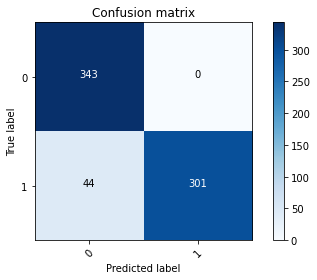

In [59]:
y_pred=model.predict(X_train)
y_expected=pd.DataFrame(y_train)
cnf_matrix=confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [60]:
Precision = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[0][1])
Recall = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[1][0])
F1 = 2*(Precision*Recall)/(Precision+Recall)
print("Precision:",Precision)
print("Recall:",Recall)
print("F1:",F1)

Precision: 1.0
Recall: 0.8724637681159421
F1: 0.9318885448916409


# Confusion Matrix for the Test Set



Confusion matrix, without normalization
[[149   0]
 [ 21 126]]


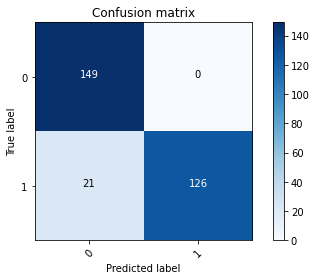

In [61]:
y_pred=model.predict(X_test)
y_expected=pd.DataFrame(y_test)
cnf_matrix=confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [62]:
Precision = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[0][1])
Recall = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[1][0])
F1 = 2*(Precision*Recall)/(Precision+Recall)
print("Precision:",Precision)
print("Recall:",Recall)
print("F1:",F1)

Precision: 1.0
Recall: 0.8571428571428571
F1: 0.923076923076923


# Confusion Matrix for Entire dataset

Confusion matrix, without normalization
[[280379   3936]
 [    65    427]]


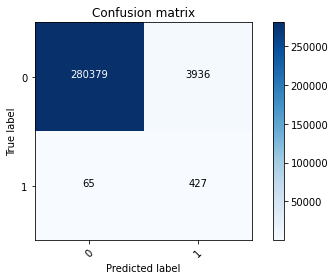

In [63]:
y_pred=model.predict(X)
cnf_matrix=confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [64]:
Precision = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[0][1])
Recall = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[1][0])
F1 = 2*(Precision*Recall)/(Precision+Recall)
print("Precision:",Precision)
print("Recall:",Recall)
print("F1:",F1)

Precision: 0.09786843914737565
Recall: 0.8678861788617886
F1: 0.17590113285272913


# Synthetic Minority Over-sampling Technique (SMOTE)

This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input. This implementation of SMOTE does not change the number of majority cases.

The new instances are not just copies of existing minority cases; instead, the algorithm takes samples of the feature space for each target class and its nearest neighbors, and generates new examples that combine features of the target case with features of its neighbors. This approach increases the features available to each class and makes the samples more general.

SMOTE takes the entire dataset as an input, but it increases the percentage of only the minority cases. 

In [65]:
X_resample,y_resample=SMOTE().fit_sample(X,y.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [66]:
y_resample=pd.DataFrame(y_resample)
X_resample=pd.DataFrame(X_resample)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3, random_state=0)

In [68]:
X_train = np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

# Applying Keras Sequential Model on Oversampled dataset

In [69]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=15, epochs=5)

Epoch 1/5
26537/26537 [==============================] - 41s 2ms/step - loss: 0.0694 - accuracy: 0.9736
Epoch 2/5
26537/26537 [==============================] - 40s 1ms/step - loss: 0.0209 - accuracy: 0.9942
Epoch 3/5
26537/26537 [==============================] - 40s 1ms/step - loss: 0.0162 - accuracy: 0.9956
Epoch 4/5
26537/26537 [==============================] - 40s 1ms/step - loss: 0.0142 - accuracy: 0.9964
Epoch 5/5
26537/26537 [==============================] - 40s 2ms/step - loss: 0.0113 - accuracy: 0.9972


# Confusion Matrix for the Train set


Confusion matrix, without normalization
[[198379    764]
 [     1 198897]]


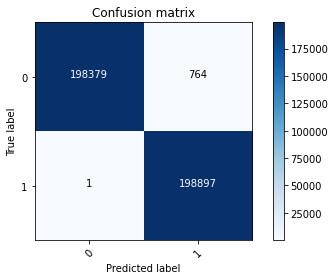

In [70]:
y_pred=model.predict(X_train)
y_expected=pd.DataFrame(y_train)
cnf_matrix=confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [71]:
Precision = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[0][1])
Recall = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[1][0])
F1 = 2*(Precision*Recall)/(Precision+Recall)
print("Precision:",Precision)
print("Recall:",Recall)
print("F1:",F1)

Precision: 0.9961735141064104
Recall: 0.9999949722973585
F1: 0.9980805853085741


# Confusion Matrix for the test set



Confusion matrix, without normalization
[[84816   356]
 [    1 85416]]


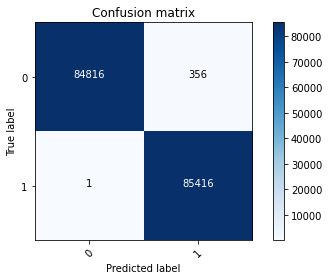

In [72]:
y_pred=model.predict(X_test)
y_expected=pd.DataFrame(y_test)
cnf_matrix=confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [73]:
Precision = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[0][1])
Recall = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[1][0])
F1 = 2*(Precision*Recall)/(Precision+Recall)
print("Precision:",Precision)
print("Recall:",Recall)
print("F1:",F1)

Precision: 0.9958494613626825
Recall: 0.9999882927286138
F1: 0.9979145856334226


# Confusion Matrix for entire dataset

Confusion matrix, without normalization
[[283195   1120]
 [     0    492]]


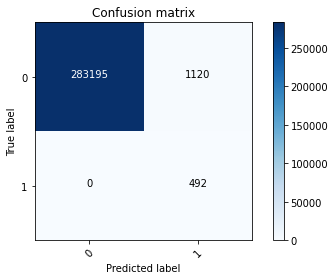

In [74]:
y_pred=model.predict(X)
cnf_matrix=confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [75]:
Precision = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[0][1])
Recall = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[1][0])
F1 = 2*(Precision*Recall)/(Precision+Recall)
print("Precision:",Precision)
print("Recall:",Recall)
print("F1:",F1)

Precision: 0.3052109181141439
Recall: 1.0
F1: 0.46768060836501896


# Conclusion

Since, our goal was to reduce the false negatives which we have reduced significantly to 2 using SMOTE oversampling technique.